<a href="https://colab.research.google.com/github/skumbham/Week-1-Assignment---Data-analysis-warmup/blob/main/Week_1_Assignment_Bank_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**skumbham@syr.edu**

#**Bank Data Analysis - Week 1 Assignment**

# Required Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Loading the Data

In [5]:
data = pd.read_csv("/content/bank-additional-full.csv", sep=";")
#I've used bank-additional-full.csv for this assignment.

# Understanding the Data

In [7]:
data.head()
#The Data is about a bank marketing campaign.
#The dataset contains information about clients' personal details,
#the economic context at the time of contact, and the result of the marketing campaign.
#Google Collab is able to view only first 20 columns apart from these columns there's one more column y.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
print(data.dtypes)
#Understanding the datatype of each column.
#What each column represents about.

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


age: Age of the customer

job: Type of job

marital: Marital status

education: Education level

default: Has credit in default?

housing: Has housing loan?

loan: Has personal loan?

contact: Type of communication contact

month: Last contact month

day_of_week: Last contact day of the week

duration: Last contact duration


campaign: Number of contacts performed during this campaign for this client

pdays: Number of days since the client was last contacted from a previous campaign

previous: Number of contacts performed before this campaign for this client

poutcome: Outcome of the previous marketing campaign

emp.var.rate: Employment variation rate

cons.price.idx: Consumer price index

cons.conf.idx: Consumer confidence index

euribor3m: Euribor 3 month rate

nr.employed: Number of employees

y: Has the client subscribed to a term deposit?

In [9]:
 data.describe()
 nas = data.isnull().sum()
 nas
 #Understanding all descriptive statistics of the numerical data.
 #Finding if there are any na's in the data.
 #There are no missing values in the data

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#**Visualizing the Data for Easy Understanding**

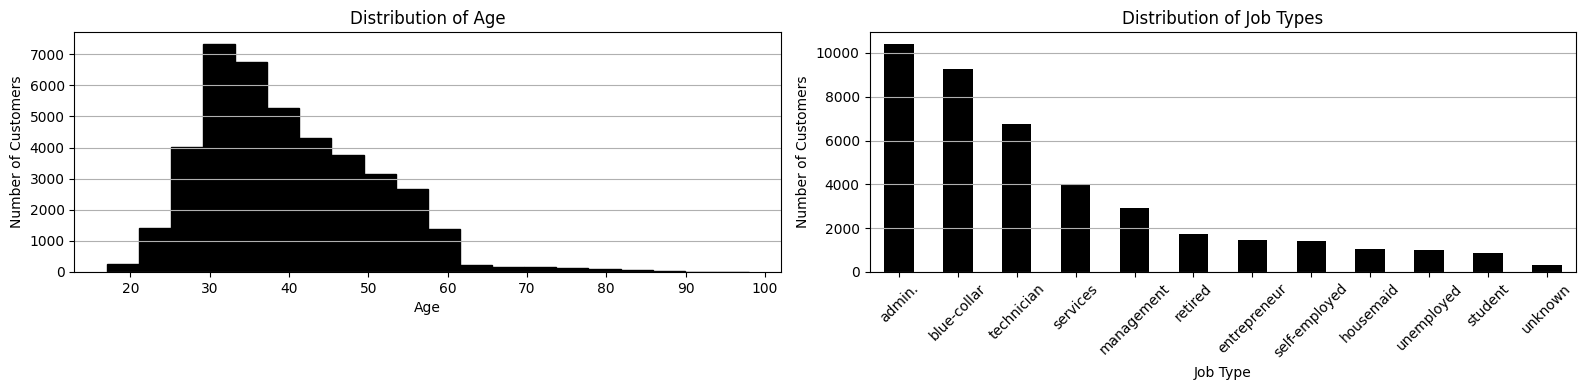

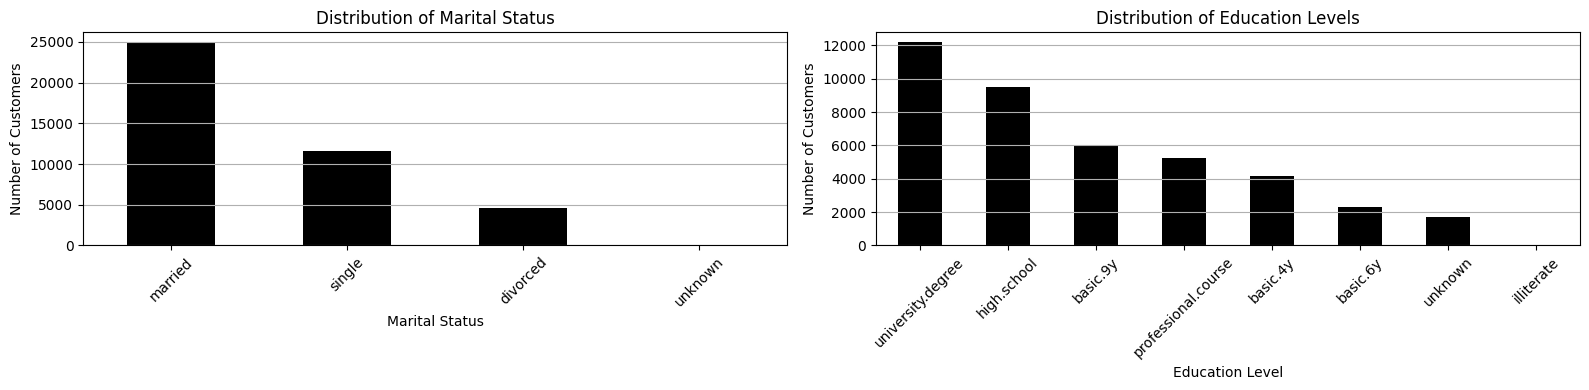

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

#Distribution of Age
ax[0].hist(data['age'], bins=20, edgecolor='black', color='Black')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Distribution of Age')
ax[0].grid(axis='y')

#Distribution of Job Types
data['job'].value_counts().plot(kind='bar', color='black', ax=ax[1])
ax[1].set_xlabel('Job Type')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Distribution of Job Types')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))

#Distribution of Marital Status
data['marital'].value_counts().plot(kind='bar', color='black', ax=ax[0])
ax[0].set_xlabel('Marital Status')
ax[0].set_ylabel('Number of Customers')
ax[0].set_title('Distribution of Marital Status')
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y')

#Distribution of Education Level
data['education'].value_counts().plot(kind='bar', color='black', ax=ax[1])
ax[1].set_xlabel('Education Level')
ax[1].set_ylabel('Number of Customers')
ax[1].set_title('Distribution of Education Levels')
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y')

plt.tight_layout()
plt.show()



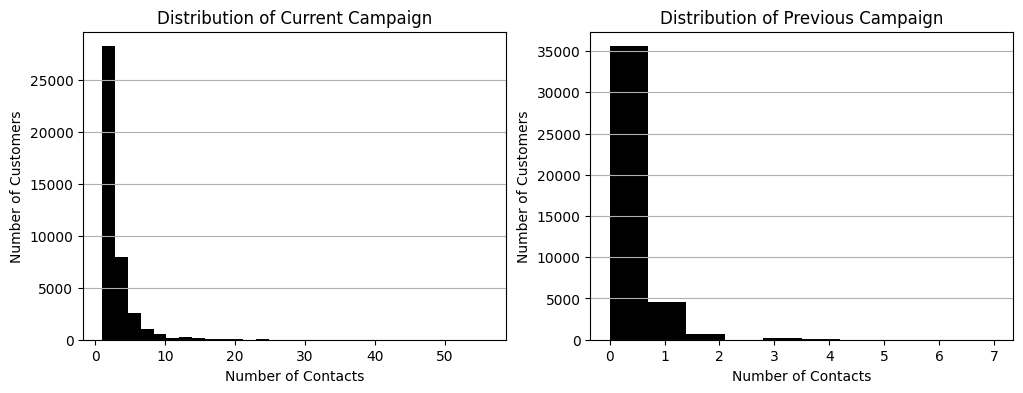

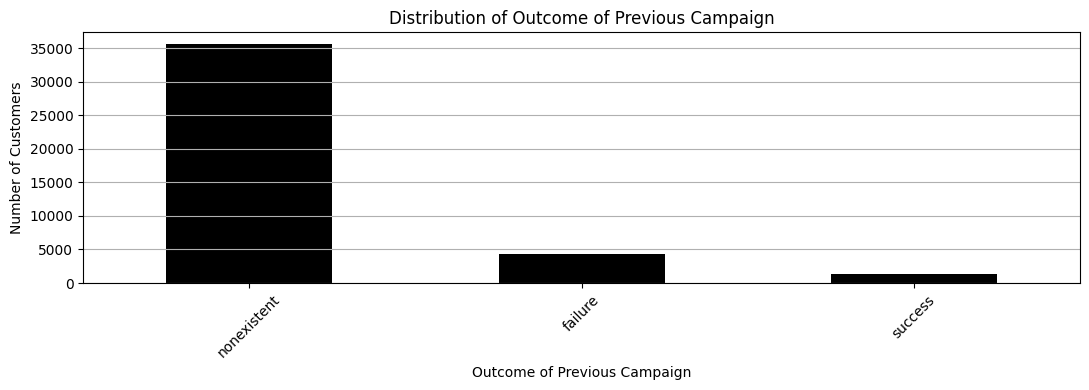

In [11]:
# Plotting the distribution of the number of contacts during this campaign
#I've used sub plots for easy comparison of the data between two campaigns
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Current campaign
ax[0].hist(data['campaign'], bins=30, color='black')
ax[0].set_title('Distribution of Current Campaign')
ax[0].set_xlabel('Number of Contacts')
ax[0].set_ylabel('Number of Customers')
ax[0].grid(axis='y')
plt.show

# Previous campaign contacts
ax[1].hist(data['previous'], bins=10, color='black')
ax[1].set_title('Distribution of Previous Campaign')
ax[1].set_xlabel('Number of Contacts')
ax[1].set_ylabel('Number of Customers')
ax[1].grid(axis='y')
plt.show()

# Plotting the distribution of the outcome of the previous marketing campaign
plt.figure(figsize=(11, 4))
data['poutcome'].value_counts().plot(kind='bar', color='black')
plt.xlabel('Outcome of Previous Campaign')
plt.ylabel('Number of Customers')
plt.title('Distribution of Outcome of Previous Campaign')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


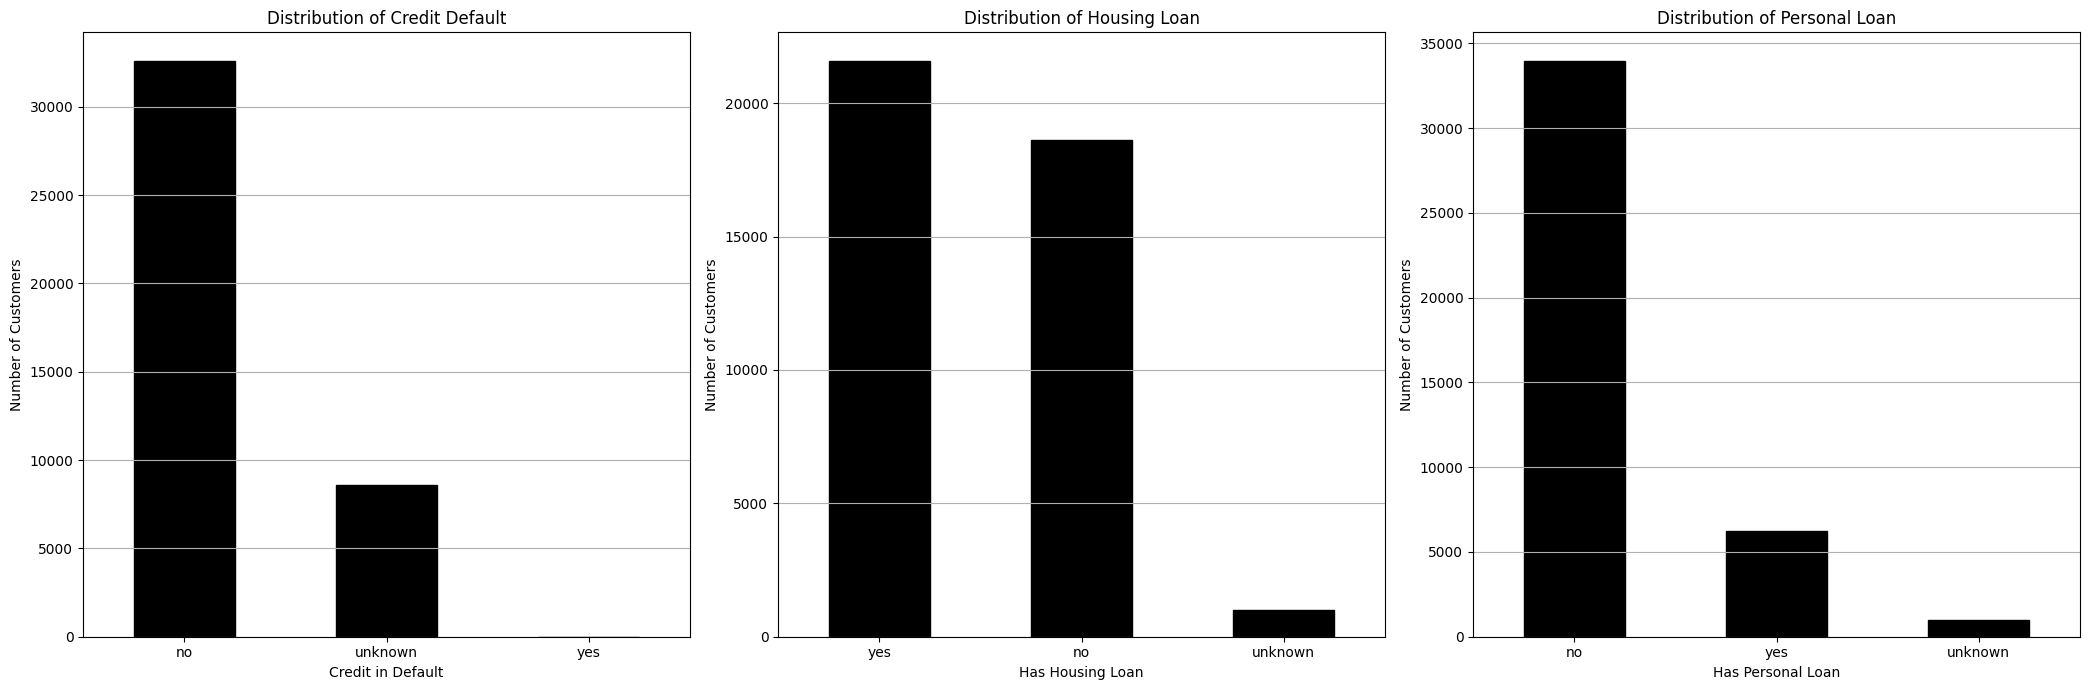

In [12]:
# Plotting the distribution of credit default, housing loan, and personal loan
fig, ax = plt.subplots(1, 3, figsize=(21, 7))

# Credit default
data['default'].value_counts().plot(kind='bar', ax=ax[0], color='black', edgecolor='black')
ax[0].set_title('Distribution of Credit Default')
ax[0].set_xlabel('Credit in Default')
ax[0].set_ylabel('Number of Customers')
ax[0].grid(axis='y')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

# Housing loan
data['housing'].value_counts().plot(kind='bar', ax=ax[1], color='black', edgecolor='black')
ax[1].set_title('Distribution of Housing Loan')
ax[1].set_xlabel('Has Housing Loan')
ax[1].set_ylabel('Number of Customers')
ax[1].grid(axis='y')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

# Personal loan
data['loan'].value_counts().plot(kind='bar', ax=ax[2], color='black', edgecolor='black')
ax[2].set_title('Distribution of Personal Loan')
ax[2].set_xlabel('Has Personal Loan')
ax[2].set_ylabel('Number of Customers')
ax[2].grid(axis='y')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()



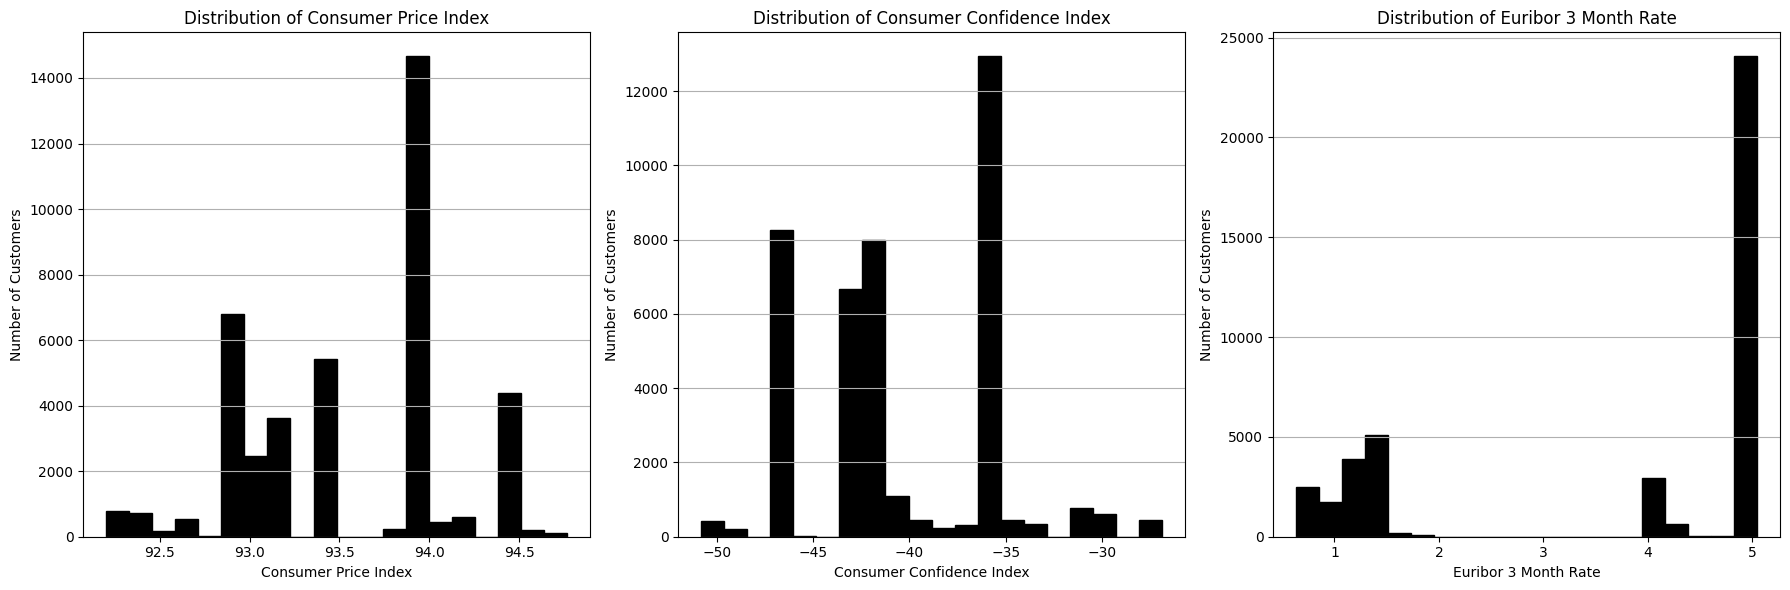

In [13]:
# Plotting the distribution of other macroeconomic indicators
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Consumer price index
ax[0].hist(data['cons.price.idx'], bins=20, color='black', edgecolor='black')
ax[0].set_title('Distribution of Consumer Price Index')
ax[0].set_xlabel('Consumer Price Index')
ax[0].set_ylabel('Number of Customers')
ax[0].grid(axis='y')

# Consumer confidence index
ax[1].hist(data['cons.conf.idx'], bins=20, color='black', edgecolor='black')
ax[1].set_title('Distribution of Consumer Confidence Index')
ax[1].set_xlabel('Consumer Confidence Index')
ax[1].set_ylabel('Number of Customers')
ax[1].grid(axis='y')

# Euribor 3 month rate
ax[2].hist(data['euribor3m'], bins=20, color='black', edgecolor='black')
ax[2].set_title('Distribution of Euribor 3 Month Rate')
ax[2].set_xlabel('Euribor 3 Month Rate')
ax[2].set_ylabel('Number of Customers')
ax[2].grid(axis='y')

plt.tight_layout()
plt.show()


# **Processing the Data**

In [14]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
# Removing the target column 'y' from the Categorical_cols data
categorical_cols.remove('y')
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()
# Create a column transformer for preprocessing as there is numerical and categorical data aswell
#Scaling the Data & converting the categorical data to required format.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])
# Applying the transformations
data_preprocessed = preprocessor.fit_transform(data)
print('Numerical Columns:', numerical_cols)
print('Categorical Columns:', categorical_cols)

Numerical Columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


# **Elbow Method for Determining the Number of Clusters**

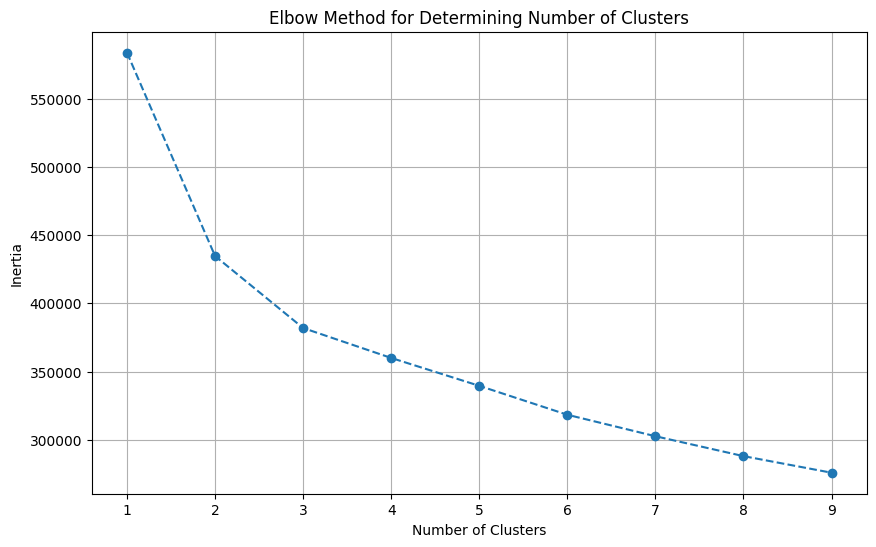

In [15]:
# Ive given the cluster range as 1-10 for Elbow Method
cluster_range = range(1, 10)
# Calculating the inertia for each cluster
inertias = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_preprocessed)
    inertias.append(kmeans.inertia_)
# Ploting the results
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()
#The Elbow Method Suggests 2-3 Clusters, hence I am choosing 3 clusters.

# **K-Means Clustering**

In [16]:
# Performing k-means clustering with 3 clusters as per the Elbow Method
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)
clusters = kmeans.fit_predict(data_preprocessed)

# Adding the cluster labels back to the original dataset
data['Cluster'] = clusters

# Display the distribution of records in each cluster
cluster_distribution = data['Cluster'].value_counts().sort_index()
cluster_distribution

0     1541
1    12002
2    27645
Name: Cluster, dtype: int64

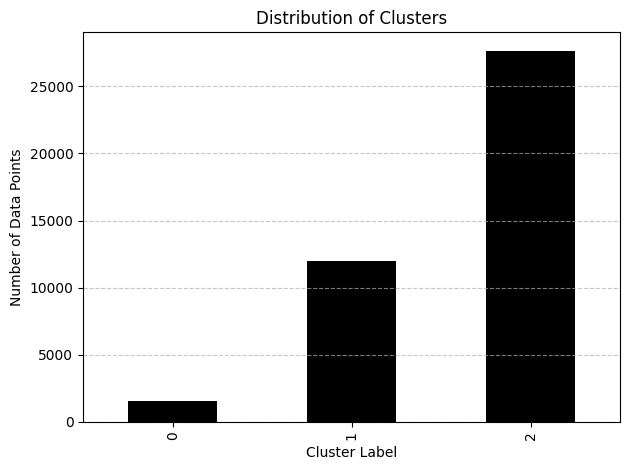

In [17]:
#Distribution of Clusters
cluster_counts = data['Cluster'].value_counts().sort_index()
cluster_counts.plot(kind='bar', color='black')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

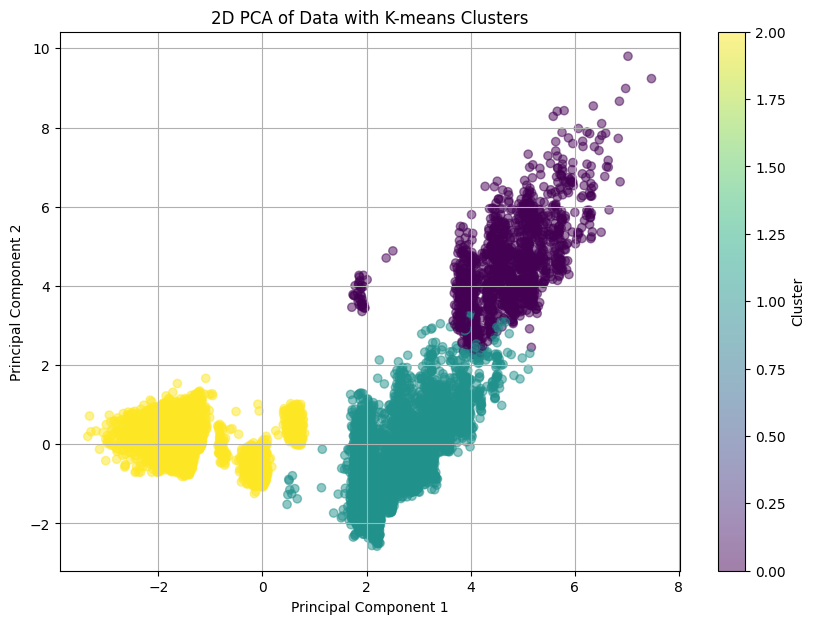

In [18]:
# Applying PCA and reduce the data to 2 principal components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_preprocessed)

# Plotting the Clusters
plt.figure(figsize=(10, 7))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Data with K-means Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


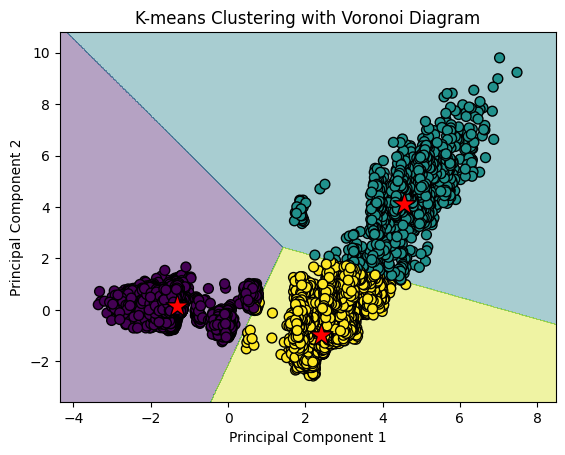

In [19]:
# Fit k-means to the 2D data
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_2d = kmeans_2d.fit_predict(principal_components)

#Decision Boundaries

#Calculating Min/Max data points for Decision Boundaries
x_min, x_max = principal_components[:, 0].min() - 1, principal_components[:, 0].max() + 1
y_min, y_max = principal_components[:, 1].min() - 1, principal_components[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000),
                     np.linspace(y_min, y_max, 1000))

Z = kmeans_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Plotting
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters_2d, marker='o', edgecolors='k', s=50)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], s=300, c='red', marker='*', edgecolors='k')
plt.title("K-means Clustering with Voronoi Diagram")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


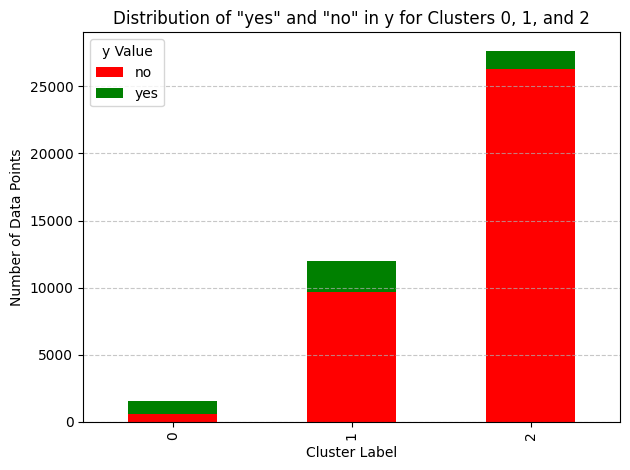

In [20]:
# Filtering data for clusters 0, 1, and 2
filtered_data = data[data['Cluster'].isin([0, 1, 2])]
Cluster_Analysis = filtered_data.groupby(['Cluster', 'y']).size().unstack()

# Distribution of Yes/No in the Clusters
Cluster_Analysis.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Distribution of "yes" and "no" in y for Clusters 0, 1, and 2')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Data Points')
plt.legend(title='y Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [21]:
# Cluster Profilling
# Group by the cluster and mean of each feature
cluster_profile = data.groupby('Cluster').mean()

#I'm using mode for Nonnumeric columns
for column in data.select_dtypes(include=['object']).columns:
    mode = data.groupby('Cluster')[column].apply(lambda x: x.mode()[0])
    cluster_profile[column] = mode

print(cluster_profile)
def cluster_profiling(data, Cluster):
    # Group by Cluster and calculate mean for each column
    cluster_profile = data.groupby(Cluster).mean()

    # Display size of each Cluster
    cluster_size = data[Cluster].value_counts().sort_index()
    cluster_profile['Size'] = cluster_size

    return cluster_profile

               age    duration  campaign       pdays  previous  emp.var.rate  \
Cluster                                                                        
0        41.903958  322.179753  1.829332   22.768332  1.695652     -2.089293   
1        39.393934  263.653808  2.124896  999.000000  0.317697     -2.025479   
2        40.192838  252.392512  2.800940  999.000000  0.025249      1.117819   

         cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  marital  \
Cluster                                                         ...            
0             93.352036     -38.327515   0.983152  5028.533744  ...  married   
1             92.986623     -43.190818   1.202412  5077.980153  ...  married   
2             93.843861     -39.456763   4.818496  5213.419671  ...  married   

                 education default housing loan   contact month day_of_week  \
Cluster                                                                       
0        university.degree      no     y

<ipython-input-21-1b5e2d7807a6>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profile = data.groupby('Cluster').mean()


# **Logistic Regression**

In [22]:
# Converting target variable 'y' to binary
label_enc = LabelEncoder()
data['y'] = label_enc.fit_transform(data['y'])

#One-hot encoding since they are categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Splitting the data into training and testing sets
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, X_test.shape

((32950, 54), (8238, 54))

In [23]:
#Inializing the Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

#Predicted values stored in y_pred
y_pred = logreg.predict(X_test)

#y_test values compared with y_pred providing the Accuracy
accuracy = accuracy_score(y_test, y_pred)

#Classification report provides precision, recall, f1-score, and support for each class.
class_report = classification_report(y_test, y_pred)

#Confusion Matrix provides the predicted Classifications
conf_matrix = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('\nClassification Report:\n', class_report)
print('\nConfusion Matrix:\n', conf_matrix)

Accuracy: 0.9113862588006798

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.43      0.53       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Confusion Matrix:
 [[7102  201]
 [ 529  406]]


#Answering The Questions:

**1. How do customers segment? Can you identify different, distinctive features that characterize these different segments?**



*   Firstly, we can do segmentation using the Demographics. For this, we have featured columns such as age, jobrole, marital and education.
*   Secondly, we can do segmentation using they reacted with each campaign conducted. For this, we can use columns such as campaign, previous,poutcome and duration.
*Finally, we can do segmentation using financial constrains. For this, we can use columns such as default, housin, loan, emp.var.rate

**2. Can you predict which customers will subscribe to a term deposit?**


*   The subscription rates for the term deposit across the clusters are:

Cluster 0: Approximately 63.14%

Cluster 1: Approximately 19.43%

Cluster 2: Approximately 4.83%



*  Cluster 0 has the highest rate of subscribing to the term deposit
* From the analysis, it's evident that clients in Cluster 0 were contacted more recently from a previous campaign, had more contacts before this campaign, had longer durations of the last contact, showed a more negative employment variation rate.
*Thus clients with these characteristics will be top ones in subscribing to the term deposit.

**3. How does the likelihood of subscription correlate with the customer segments?**


*   By looking at the Distribtion of YES/NO in the clusters, we can say that Cluster 0 has highest likelihood of Sybscription with a rate of approximately 63.14%.
*   Followed by Cluster 1, approximately around 19.43%.

*   CLuster 2 has the lowest likelihood of subscription, with rate only about 4.83%.


**3. What advice do you have for where to put our marketing dollars right now?**


*   Focus on Recent Engagements: recency played a crucial role in their likelihood to subscribe as seen in the insights from cluser 0.

*   Value Quality Interactions: The longer durations of the last contact for Cluster 0 suggest that extended and possibly more in-depth conversations correlate with a higher subscription rate. Train marketing and sales teams to focus on quality interactions rather than rushing through calls or meetings.

*   Understand Economic Indicators: Clients in Cluster 0 showed a more negative employment variation rate, hinting that macroeconomic factors might influence their decisions. For instance, during economic downturns, highlight the security or benefits of a term deposit. Offering special rates or terms during such periods might also attract more subscribers.









